In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
import numpy as np
import cv2
import random


def k_means_clustering(img,k):
    r,c = img.shape

    my_dict = {i: [] for i in range(0, k)}
    centroid_list = random.sample(range(0, 256), k)
    distance_list = [0]*k
    check = 0

    while(True):
        for i in range(r):
            for j in range(c):
                current_pixel = int(img[i,j])

                for z in range(len(distance_list)):
                    distance = abs(centroid_list[z] - current_pixel)
                    distance_list[z] = distance

                #print(f'Distance List: {distance_list}')

                minimum_distance = distance_list[0]
                minimum_distance_index = 0
                for z in range(len(distance_list)):
                    if(distance_list[z]<minimum_distance):
                        minimum_distance = distance_list[z]
                        minimum_distance_index = z

                #print(f'Minimum Distance : {minimum_distance}')
                #print(f'Minimum Distance Index : {minimum_distance_index}')

                my_dict[minimum_distance_index].append(current_pixel)

        #print(f'Dictionary: {my_dict}')
        #print(f'Centroid list: {centroid_list}')

        for y in range(len(centroid_list)):
            new_centre = np.mean(my_dict[y])
            if(abs(centroid_list[y]-new_centre)<=1):
                check += 1
            centroid_list[y] = int(new_centre)

        #print(f'New Centroid list: {centroid_list}')



        if(check==k):
            return centroid_list
        else:
            for x in range(k):
                my_dict[x] = []
            check=0
        #print(f'New Dictionary: {my_dict}')


def apply_thresholding(img,centroid_list):
    r,c = img.shape
    distance_list = [0]*len(centroid_list)

    for i in range(r):
        for j in range(c):
            current_pixel = int(img[i,j])

            for k in range(len(centroid_list)):
                distance = abs(current_pixel-centroid_list[k])
                distance_list[k] = distance

            min_val = distance_list[0]
            index = 0
            for l in range(len(distance_list)):
                if(distance_list[l]<min_val):
                    min_val = distance_list[l]
                    index = l

            img[i,j] = centroid_list[index]

    return img

img = cv2.imread('241.bmp',0)

img1 = img.copy()
img2 = img.copy()
cv2.imshow('Original Image',img)
cv2.waitKey()

centroid_list = k_means_clustering(img,3)

newimg = apply_thresholding(img,centroid_list)
cv2.imshow('Output Image',newimg)
cv2.waitKey()



-1

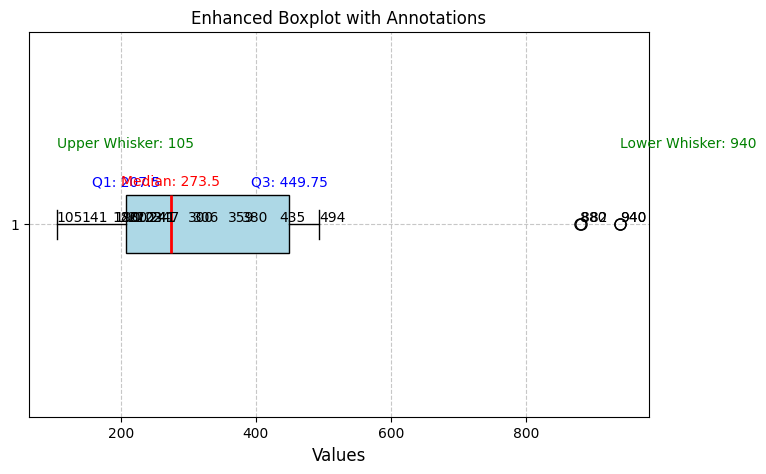

In [ ]:
import numpy as np

# Calculate Q1, Q3, and median manually
Q1 = np.percentile(data, 25)  # 25th percentile
Q3 = np.percentile(data, 75)  # 75th percentile
median = np.median(data)  # 50th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define whiskers (1.5 * IQR rule)
lower_whisker = max([x for x in data if x >= Q1 - 1.5 * IQR])
upper_whisker = min([x for x in data if x <= Q3 + 1.5 * IQR])

# Identify outliers
outliers = [x for x in data if x < lower_whisker or x > upper_whisker]

# Create a new boxplot with annotations
plt.figure(figsize=(8, 5))
box = plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"),
                  medianprops=dict(color="red", linewidth=2), flierprops=dict(marker='o', color='black', markersize=8))

# Adding annotations
plt.text(Q1, 1.1, f'Q1: {Q1}', horizontalalignment='center', fontsize=10, color='blue')
plt.text(median, 1.1, f'Median: {median}', horizontalalignment='center', fontsize=10, color='red')
plt.text(Q3, 1.1, f'Q3: {Q3}', horizontalalignment='center', fontsize=10, color='blue')
plt.text(lower_whisker, 1.2, f'Lower Whisker: {lower_whisker}', fontsize=10, color='green')
plt.text(upper_whisker, 1.2, f'Upper Whisker: {upper_whisker}', fontsize=10, color='green')

# Annotate outliers
for outlier in outliers:
    plt.text(outlier, 1, f'{outlier}', verticalalignment='bottom', fontsize=10, color='black')

# Adding labels and grid
plt.title("Enhanced Boxplot with Annotations", fontsize=12)
plt.xlabel("Values", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [9]:
img = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Assignment\\dataset_DIP_assignment\\train\\images\\003.bmp', 0)

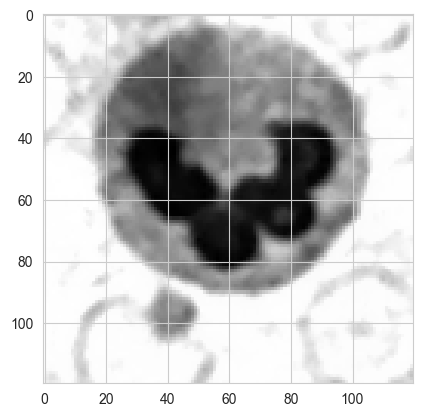

In [10]:
plt.imshow(img, cmap = "gray")

In [ ]:
def filters(img, filter_name):

    if filter_name == 'mean':
        filter_func = np.mean(img)
    elif filter_name == 'median':
        filter_func = np.median(img)
    new_img = np.zeros_like(img)
    row, col = img.shape[:2]
    for i in range(row):
        for j in range(col):
            if img[i, j] < filter_func:
                new_img[i, j] =127
            else:
                new_img[i, j] =255

    return new_img

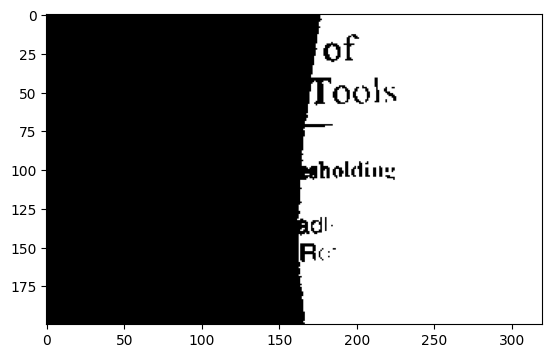

In [ ]:
new_img = filters(img, 'mean')
plt.imshow(new_img, cmap = "grey")

In [ ]:
def mean_filter(window):
    mean_val = np.mean(window)
    new_img = np.zeros_like(window)

    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if window[i, j] < mean_val:
                new_img[i, j] = 0
            else:
                new_img[i, j] = 255

    return new_img
def median_filter(window):
    mean_val = np.median(window)
    new_img = np.zeros_like(window)

    for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if window[i, j] < mean_val:
                new_img[i, j] = 0
            else:
                new_img[i, j] = 255

    return new_img
def sub_filters(img, size, filter_name):
    row, col = img.shape
    new_img = np.zeros_like(img)

    for i in range(0, row-size+1, size):
        for j in range(0, col-size+1, size):
            window = img[i:i+size, j:j+size]

            if filter_name == 'mean':
                new_img[i:i+size, j:j+size] = mean_filter(window)
            elif filter_name == 'median':
                new_img[i:i+size, j:j+size] = median_filter(window)

    return new_img

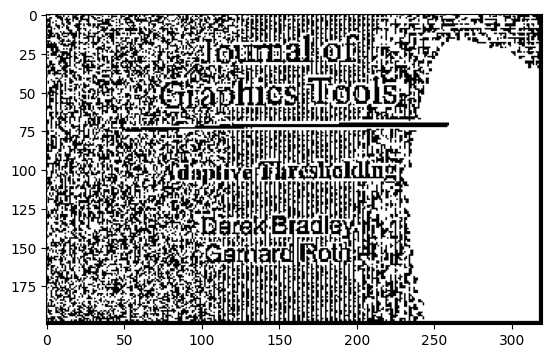

In [ ]:
sub_img = sub_filters(img, 3, 'mean')
plt.imshow(sub_img, cmap = "grey")

Converged at iteration: 9


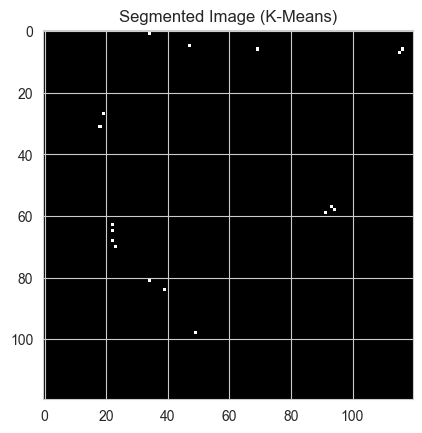

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def compute_dist(centroids, val):
    """Compute the closest centroid index for a given value."""
    centroids = np.array(centroids)
    distances = np.abs(centroids - val)  # Use absolute difference
    return np.argmin(distances)

def k_means_clustering(img, num_cent, max_iter=100):
    """Apply K-Means clustering to an image for segmentation."""

    rows, cols = img.shape

    # Initialize centroids randomly from image intensity values
    cent_means = np.random.choice(img.flatten(), num_cent, replace=False)

    for k in range(max_iter):
        # Assign each pixel to the nearest centroid
        clusters = {i: [] for i in range(num_cent)}

        for i in range(rows):
            for j in range(cols):
                index = compute_dist(cent_means, img[i, j])
                clusters[index].append(img[i, j])

        previous_centr = cent_means.copy()

        # Update centroids
        for i in range(num_cent):
            if clusters[i]:  # Avoid division errors
                cent_means[i] = np.mean(clusters[i])

        # Check for convergence
        if np.all(np.abs(previous_centr - cent_means) < 2):
            print(f"Converged at iteration: {k}")
            break

    # Assign new pixel values
    new_img = np.zeros_like(img, dtype=np.uint8)
    step = 255 // (num_cent - 1)

    for i in range(num_cent):
        new_img[np.isin(img, clusters[i])] = int(i * step)

    # Display segmented image
    plt.imshow(new_img, cmap="gray")
    plt.title("Segmented Image (K-Means)")
    plt.show()

    return new_img

# Apply K-Means Clustering
segmented_img = k_means_clustering(img, num_cent=3)


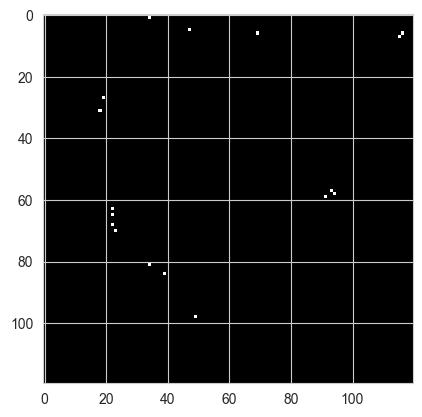

In [16]:
plt.imshow(segmented_img, cmap = "gray")

iteration :  1


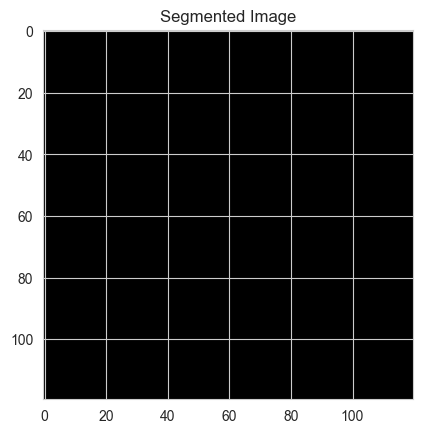

In [14]:
k_means_clustering(img, 3, 100)

[ 20  20  20  58  60  65  70  85  95 140 160 175 200 217 220 223 235 360
 380 400]


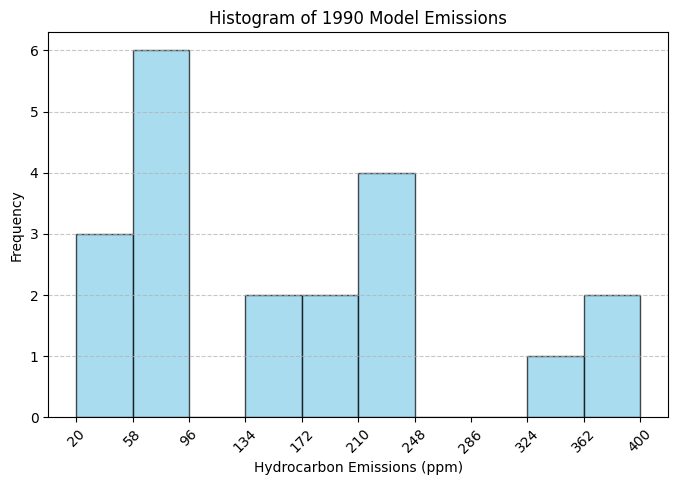

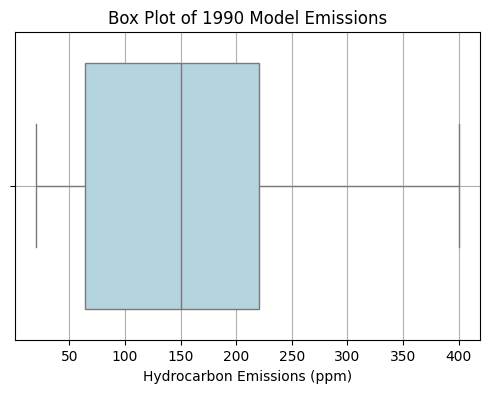

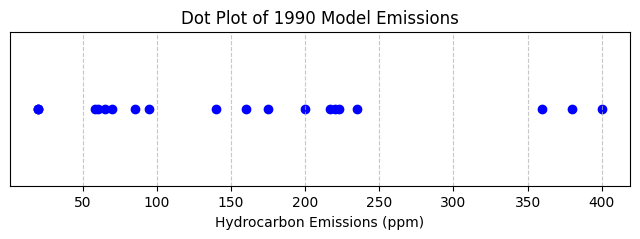

(  Class Interval  Frequency
 0        20 - 58          3
 1        58 - 96          6
 2       96 - 134          0
 3      134 - 172          2
 4      172 - 210          2
 5      210 - 248          4
 6      248 - 286          0
 7      286 - 324          0
 8      324 - 362          1
 9      362 - 400          2,
 {'Mean': 160.15,
  'Median': 150.0,
  'Mode': array([20]),
  'Variance': 14255.081578947367,
  'Standard Deviation': 119.39464635798109,
  'Q1': 63.75,
  'Q3': 220.75,
  'IQR': 157.0})

In [ ]:
# Re-import necessary libraries since execution state was reset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Given data for 1990 models
data_1990 = np.array([140, 160, 20, 20, 223, 60, 20, 95, 360, 70,
                       220, 400, 217, 58, 235, 380, 200, 175, 85, 65])

# Sorting data for descriptive statistics
sorted_data = np.sort(data_1990)
print(sorted_data)
# Frequency Distribution (Manual Calculation)
num_classes = 10
data_range = max(data_1990) - min(data_1990)
class_width = int(np.ceil(data_range / num_classes))

# Defining class intervals
bins = np.arange(min(data_1990), max(data_1990) + class_width, class_width)
hist, bin_edges = np.histogram(data_1990, bins=bins)

# Creating frequency distribution table
freq_table = pd.DataFrame({'Class Interval': [f"{int(bin_edges[i])} - {int(bin_edges[i+1])}" for i in range(len(hist))],
                           'Frequency': hist})

# Descriptive Statistics Calculation
mean_1990 = np.mean(data_1990)
median_1990 = np.median(data_1990)
mode_1990 = pd.Series(data_1990).mode().values
variance_1990 = np.var(data_1990, ddof=1)
std_dev_1990 = np.std(data_1990, ddof=1)
q1_1990 = np.percentile(data_1990, 25)
q3_1990 = np.percentile(data_1990, 75)
iqr_1990 = q3_1990 - q1_1990

# Plotting Histogram
plt.figure(figsize=(8,5))
plt.hist(data_1990, bins=bins, edgecolor="black", alpha=0.7, color="skyblue")
plt.xticks(bins, rotation=45)
plt.title("Histogram of 1990 Model Emissions")
plt.xlabel("Hydrocarbon Emissions (ppm)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Box Plot
plt.figure(figsize=(6,4))
sns.boxplot(x=data_1990, color="lightblue")
plt.title("Box Plot of 1990 Model Emissions")
plt.xlabel("Hydrocarbon Emissions (ppm)")
plt.grid(True)
plt.show()

# Creating Dot Plot
plt.figure(figsize=(8,2))
plt.scatter(data_1990, [1]*len(data_1990), marker="o", color="blue")
plt.title("Dot Plot of 1990 Model Emissions")
plt.xlabel("Hydrocarbon Emissions (ppm)")
plt.yticks([])  # Removing y-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Displaying Frequency Table & Descriptive Statistics
freq_table, {
    "Mean": mean_1990,
    "Median": median_1990,
    "Mode": mode_1990,
    "Variance": variance_1990,
    "Standard Deviation": std_dev_1990,
    "Q1": q1_1990,
    "Q3": q3_1990,
    "IQR": iqr_1990
}
